# Importing the libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression,RidgeClassifier,LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score


import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

# Enabling offline mode for Plotly
py.init_notebook_mode(connected=True)
cf.go_offline()
sns.set(style="darkgrid")

# Exploring the data

In [2]:
#Let's check the data
df=pd.read_csv("online_course_engagement_data.csv")
df.head()

UserID CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
0    5618         Health          29.979719                     17   
1    4326           Arts          27.802640                      1   
2    5849           Arts          86.820485                     14   
3    4992        Science          35.038427                     17   
4    3866    Programming          92.490647                     16   

   NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
0                     3   50.365656       20.860773           1   
1                     5   62.615970       65.632415           1   
2                     2   78.458962       63.812007           1   
3                    10   59.198853       95.433162           0   
4                     0   98.428285       18.102478           0   

   CourseCompletion  
0                 0  
1                 0  
2                 1  
3                 1  
4                 0

In [3]:
print(f"number of rows:--> {df.shape[0]} and number of columns:--> {df.shape[1]}")

number of rows:--> 9000 and number of columns:--> 9


# Cleaning

In [4]:
#Dropping the useless columns
df = df.drop(columns=['UserID'])

In [5]:
#Checking for null values
df.isnull().sum()

CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64

In [6]:
#Checking for duplicated rows & removing them if they exist
def dupli_rows(df):
    print("Numbers of duplicated rows :",df.duplicated().sum())
    df = df.drop_duplicates(keep='first')
    print("Numbers of duplicated rows after remove :",df.duplicated().sum())
   
dupli_rows(df)

Numbers of duplicated rows : 877
Numbers of duplicated rows after remove : 0


# Transformation

In [7]:
df.columns

Index(['CourseCategory', 'TimeSpentOnCourse', 'NumberOfVideosWatched',
       'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate', 'DeviceType',
       'CourseCompletion'],
      dtype='object')

In [8]:
#Checking the attributes in columns
category_col =["CourseCategory","DeviceType","CourseCompletion"]
for column in df[category_col]:
    print(f"{column}: {df[column].unique()}")
    print("---------------------------------------------------------------------------------------------")


CourseCategory: ['Health' 'Arts' 'Science' 'Programming' 'Business']
---------------------------------------------------------------------------------------------
DeviceType: [1 0]
---------------------------------------------------------------------------------------------
CourseCompletion: [0 1]
---------------------------------------------------------------------------------------------


In [9]:
df.describe()

TimeSpentOnCourse  NumberOfVideosWatched  NumberOfQuizzesTaken  \
count        9000.000000            9000.000000           9000.000000   
mean           50.163822              10.024667              5.090556   
std            28.491750               6.029878              3.157762   
min             1.005230               0.000000              0.000000   
25%            25.440548               5.000000              2.000000   
50%            49.818417              10.000000              5.000000   
75%            75.069924              15.000000              8.000000   
max            99.992558              20.000000             10.000000   

        QuizScores  CompletionRate   DeviceType  CourseCompletion  
count  9000.000000     9000.000000  9000.000000       9000.000000  
mean     74.706028       50.340146     0.500667          0.396444  
std      14.378383       28.950977     0.500027          0.489186  
min      50.005119        0.009327     0.000000          0.000000  
25%      62.283451       25.653614     0.000000          0.000000  
50%      74.743294       50.264124     1.000000          0.000000  
75%      87.022663       75.572493     1.000000          1.000000  
max      99.994984       99.979711     1.000000          1.000000

In [10]:
#Mapping the category as string occcurs error
mappings = {
    'Health': 1,
    'Arts': 2,
    'Science': 3,
    'Programming': 4,
    'Business': 5
}

# Apply priority-based encoding mappings to the 'CourseCategory' column
df['CourseCategory'] = df['CourseCategory'].replace(mappings)
df.corr()["CourseCompletion"]

CourseCategory           0.011329
TimeSpentOnCourse        0.182553
NumberOfVideosWatched    0.234360
NumberOfQuizzesTaken     0.284504
QuizScores               0.299983
CompletionRate           0.326139
DeviceType               0.007551
CourseCompletion         1.000000
Name: CourseCompletion, dtype: float64

# Analyzation & Visualization

<Axes: >

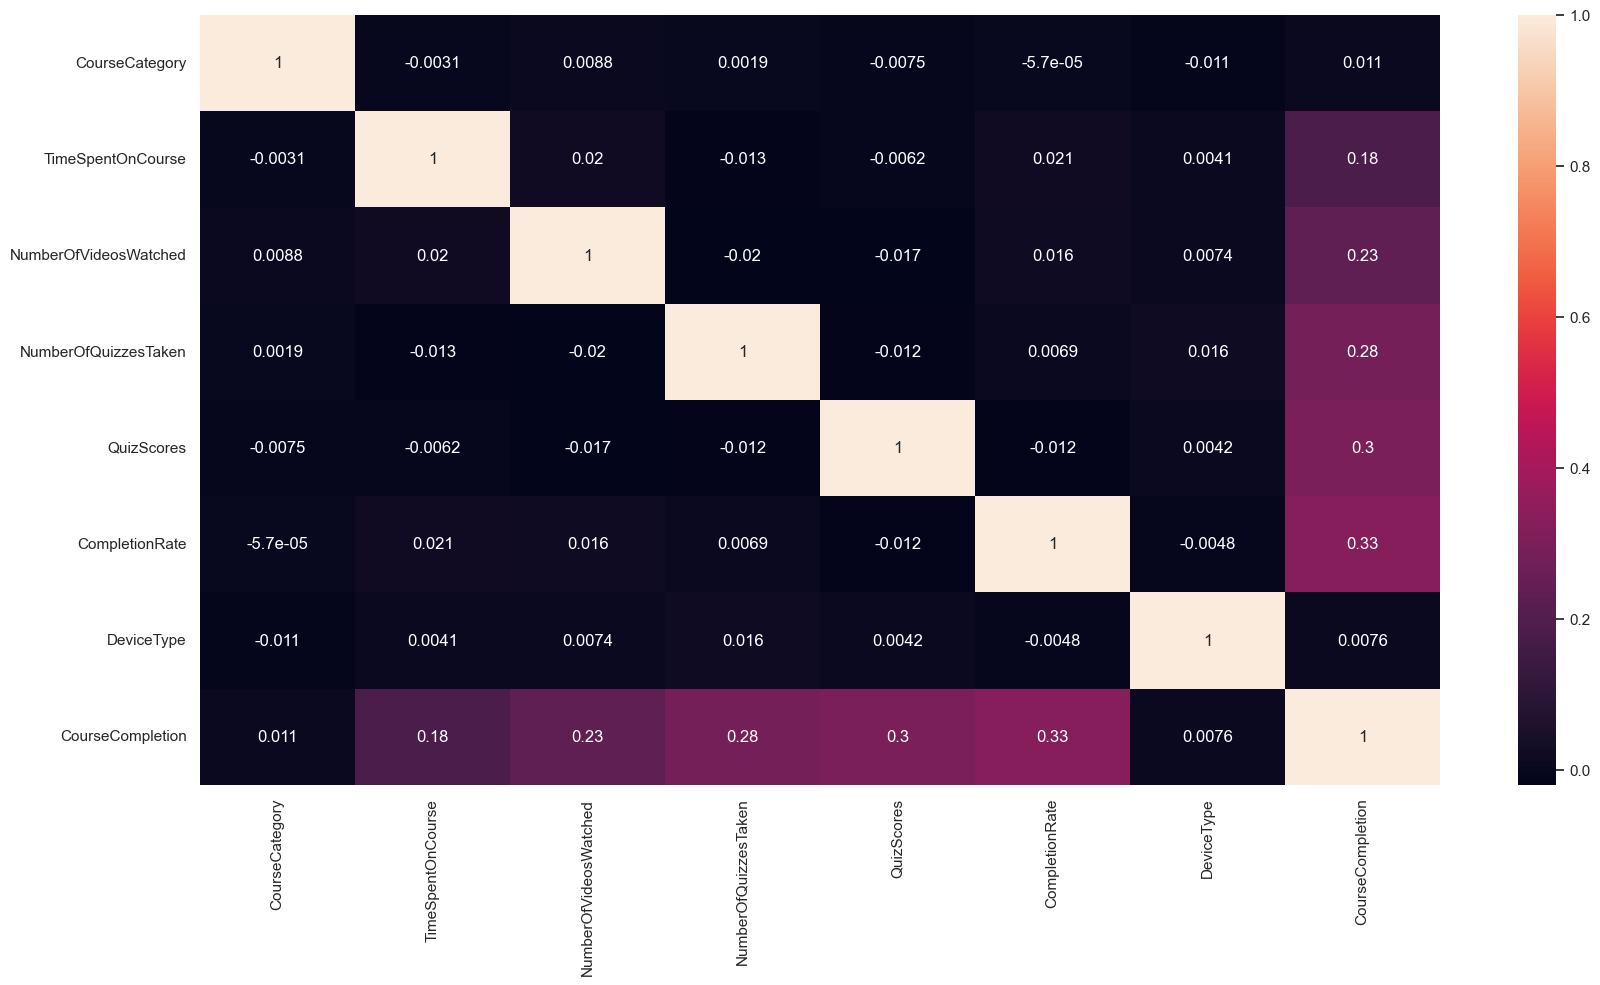

In [11]:
plt.figure(figsize=(20,10))

#plot heat map
sns.heatmap(df.corr(),annot=True,linecolor='black')

In [12]:
df.head(10)


CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
0               1          29.979719                     17   
1               2          27.802640                      1   
2               2          86.820485                     14   
3               3          35.038427                     17   
4               4          92.490647                     16   
5               1          79.466129                     12   
6               1          78.908724                     10   
7               5          12.068237                     16   
8               5          81.935709                      8   
9               4          83.394026                     15   

   NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
0                     3   50.365656       20.860773           1   
1                     5   62.615970       65.632415           1   
2                     2   78.458962       63.812007           1   
3                    10   59.198853       95.433162           0   
4                     0   98.428285       18.102478           0   
5                     7   70.233329       76.484023           0   
6                     2   86.836533       22.588896           1   
7                     3   61.553646       27.410991           1   
8                     4   90.264564       33.308437           0   
9                    10   63.956353       33.261300           1   

   CourseCompletion  
0                 0  
1                 0  
2                 1  
3                 1  
4                 0  
5                 1  
6                 0  
7                 0  
8                 1  
9                 0

In [13]:
numeric_col=["TimeSpentOnCourse","NumberOfVideosWatched","NumberOfQuizzesTaken","QuizScores","CompletionRate"]
df[numeric_col].iplot(kind='histogram',subplots=True,title='Data Distribution of Numeric Column')

In [14]:
i=1
for col in numeric_col:
    fig = px.box(df, x=col, points="all",template="plotly_dark",width=700,height=300)

    fig.show()

In [15]:
i=1
for col in numeric_col:
    fig = px.histogram(df, col,             
                       color="CourseCompletion",histfunc="count",width=800,height=400
                       )

    fig.show()

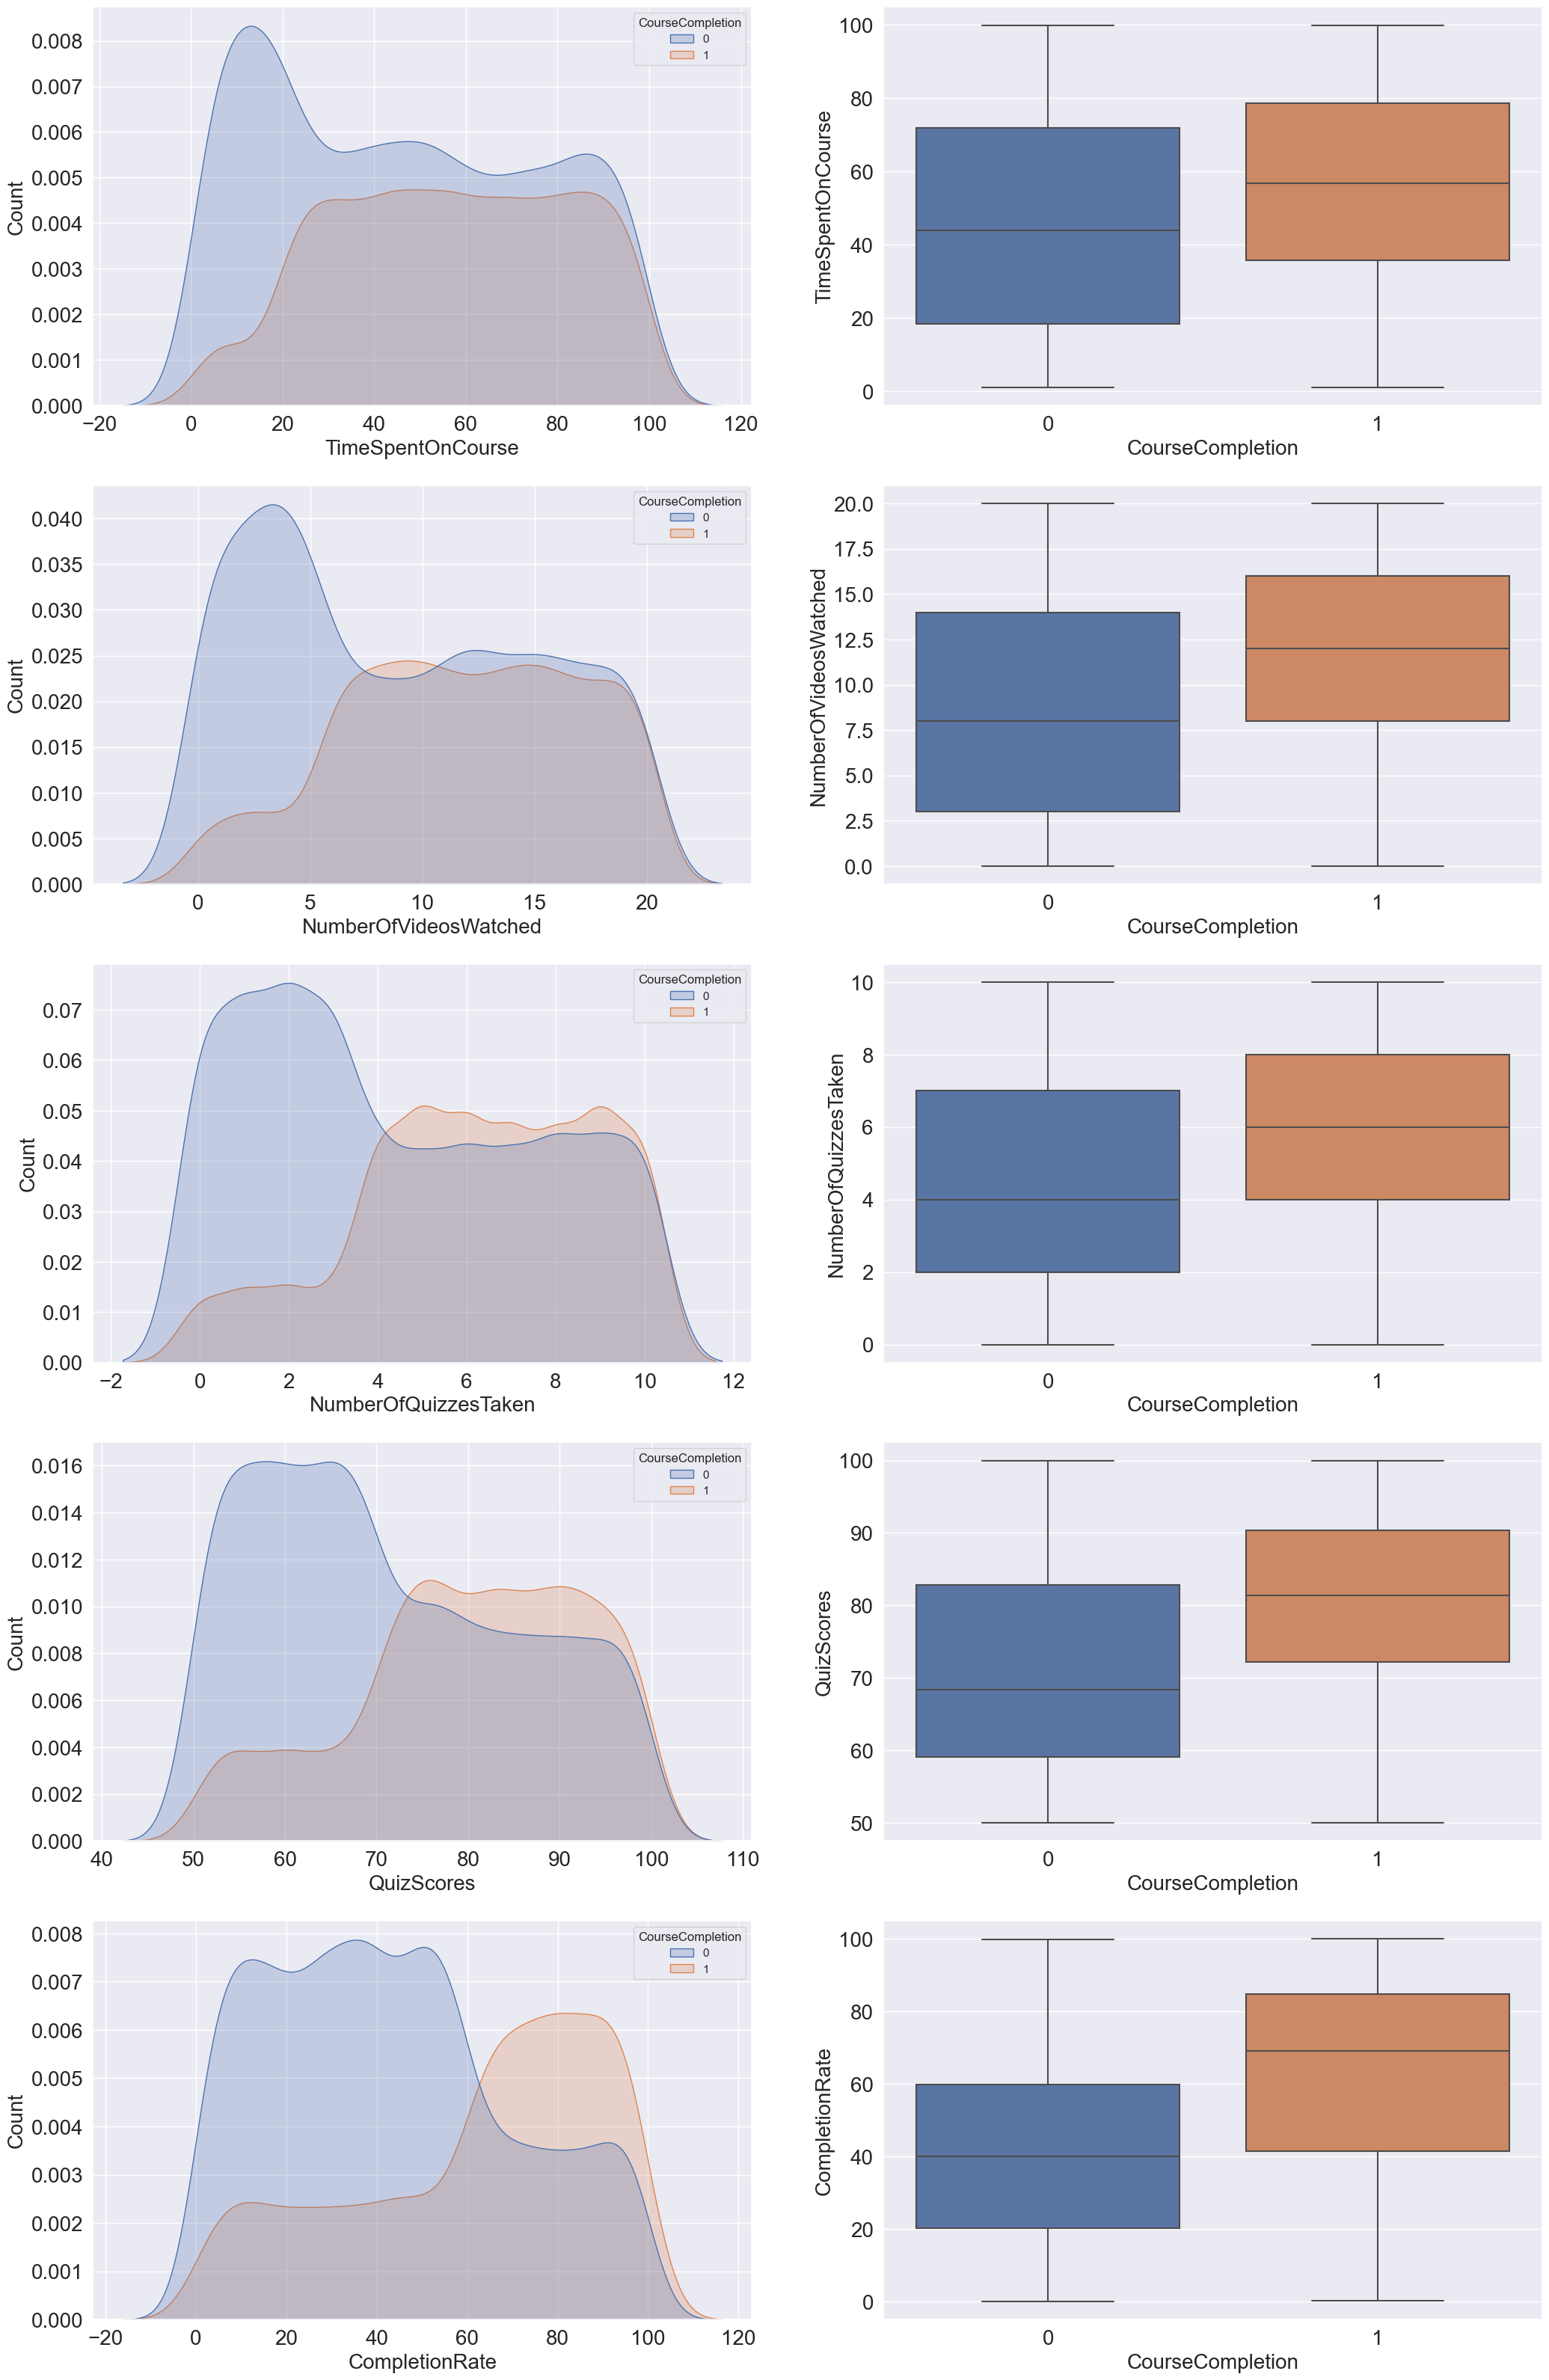

In [16]:
i = 1
plt.figure(figsize=(25, 90))

for col in numeric_col:
    plt.subplot(11, 2, i)
    sns.kdeplot(data=df, hue="CourseCompletion", x=col, fill=True)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(col, fontsize=20)
    plt.ylabel("Count", fontsize=20)
    i = i + 1
    
    plt.subplot(11, 2, i)
    sns.boxplot(x="CourseCompletion", y=col, data=df)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("CourseCompletion", fontsize=20)
    plt.ylabel(col, fontsize=20)
    i = i + 1

plt.show()

In [17]:
df['CourseCompletion'].value_counts()

CourseCompletion
0    5432
1    3568
Name: count, dtype: int64

In [18]:
colors = ['gold', 'mediumturquoise']

fig = px.pie(df, names = "CourseCompletion",
             title = "<b>Counts in CourseCompletion</b>",
             hole = 0.4, template = "plotly_dark",
            width=600,
            height=400,
            )

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))


fig.show()

In [19]:
# Calculate the value counts for CourseCategory
colors = ['gold', 'mediumturquoise']

fig = px.pie(df, names = "CourseCategory",
             title = "<b>Counts in CourseCategory</b>",
             hole = 0.4, template = "plotly_dark",
            width=600,
            height=400,
            )

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))


fig.show()

In [20]:
df['CourseCategory'].value_counts()

CourseCategory
5    1837
1    1821
3    1814
4    1810
2    1718
Name: count, dtype: int64

In [21]:
df['DeviceType'].value_counts()

DeviceType
1    4506
0    4494
Name: count, dtype: int64

In [22]:
colors = ['gold', 'mediumturquoise']

fig = px.pie(df, names = "DeviceType",
             title = "<b>Counts in DeviceType</b>",
             hole = 0.4, template = "plotly_dark",
            width=600,
            height=400,
            )

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))


fig.show()

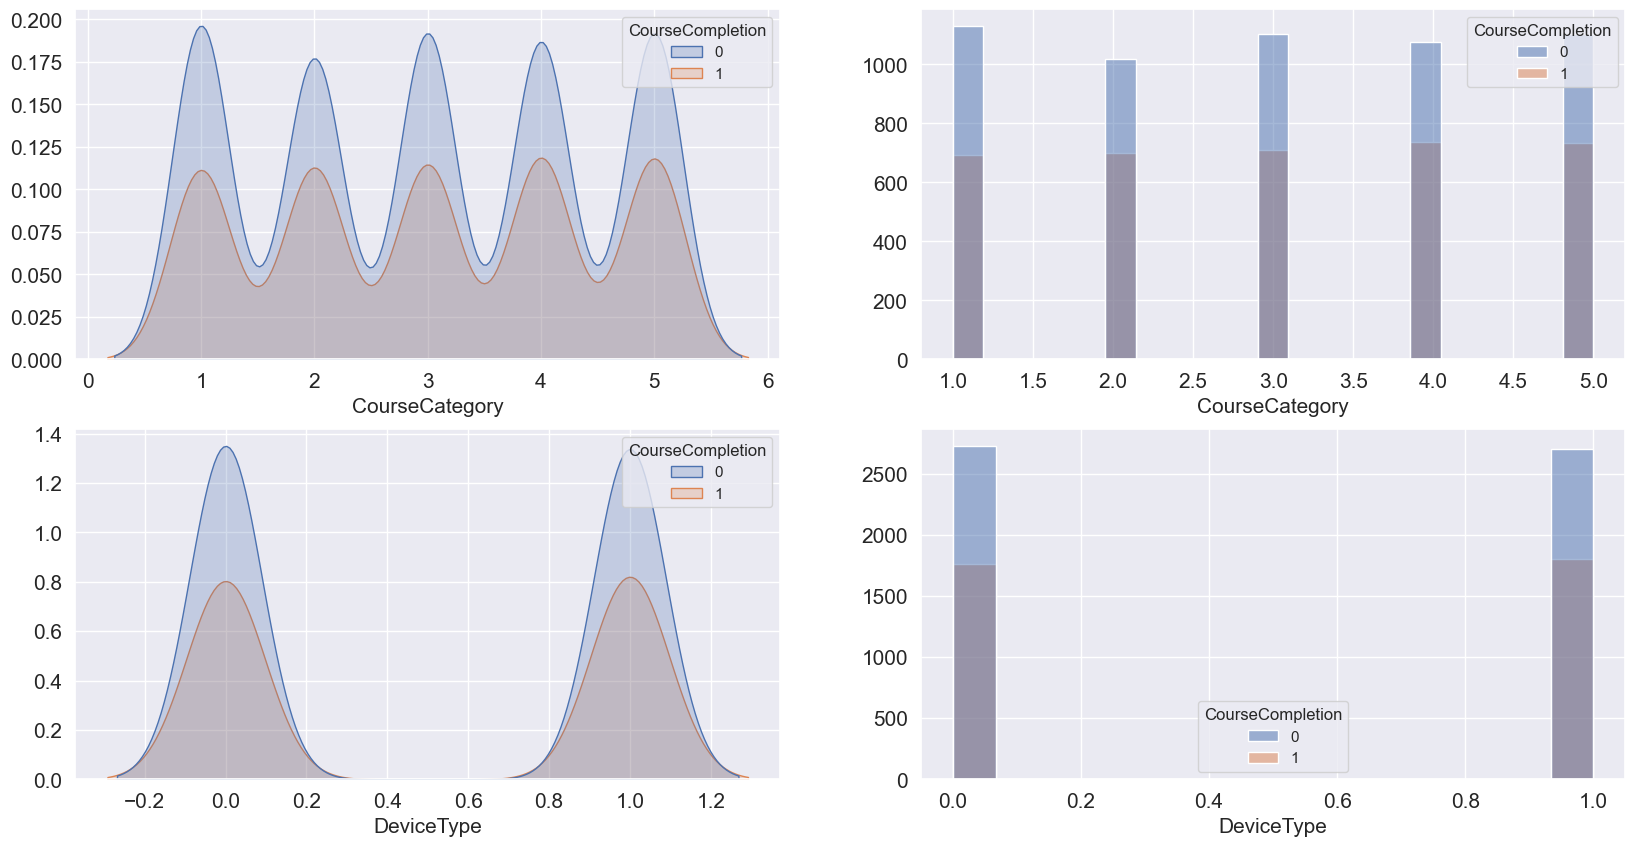

In [23]:
encoded_cat=["CourseCategory",'DeviceType']
i=1
plt.figure(figsize=(20,10))
for col in encoded_cat:
    plt.subplot(2,2,i)
    sns.kdeplot(data=df,hue="CourseCompletion",x=col,shade = "fill")
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(col,fontsize=15)
    plt.ylabel("",fontsize=15)
    i=i+1
    plt.subplot(2,2,i)
    sns.histplot(data=df,hue="CourseCompletion",x=col)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(col,fontsize=15)
    plt.ylabel("",fontsize=15)
    i=i+1

plt.show()

# Model Preparation, Training and Testing

In [24]:
X=df.iloc[:,0:-1]
y=df.CourseCompletion

In [25]:
# Spliting the data for training and testing
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train shape: ",x_train.shape)
print("X_test shape: ",x_test.shape)
print()
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (7200, 7)
X_test shape:  (1800, 7)

Y_train shape:  (7200,)
Y_test shape:  (1800,)


In [26]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle

def models_score(models, X_train, X_test, y_train, y_test):    
    scores = {}
    test_scores = {}
    train_scores = {}
    precision = {}
    recall = {}
    f1 = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        
        # Storing scores
        test_scores[name] = accuracy_score(y_test, y_pred)
        train_scores[name] = accuracy_score(y_train, y_pred_train)
        precision[name] = precision_score(y_test, y_pred, average='weighted')
        recall[name] = recall_score(y_test, y_pred, average='weighted')
        f1[name] = f1_score(y_test, y_pred, average='weighted')
        
        # Printing the model name and accuracy
        print(f"Model name: {name}")
        print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train)}")
        print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
        
        # Printing classification report
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        

        print(f"Precision: {precision[name]}, Recall: {recall[name]}, F1 Score: {f1[name]}\n")
        print()
        
        # Plotting the confusion matrix
        print("Confusion Matrix:")
        plt.figure(figsize=(6, 4))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"{name} Confusion Matrix")
        plt.show()
        
        # Plotting ROC curve for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        n_classes = len(set(y_test))

        # Compute ROC curve and ROC area for each class
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred == i)
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curve for each class
        plt.figure(figsize=(6, 4))
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
        
        print("\n<<<<------------------------------------------------------------->>>>\n")
    
    # Consolidating scores into a DataFrame
    model_scores = pd.DataFrame({
        'Test Accuracy': test_scores,
        'Train Accuracy': train_scores,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    
    return model_scores

In [27]:
models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTree": DecisionTreeClassifier(),
    "GradiantBoost": GradientBoostingClassifier(),
    "RandomForest": RandomForestClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier()
}

Model name: LogisticRegression
Train Accuracy: 0.8013888888888889
Test Accuracy: 0.7916666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1068
           1       0.77      0.70      0.73       732

    accuracy                           0.79      1800
   macro avg       0.79      0.78      0.78      1800
weighted avg       0.79      0.79      0.79      1800

Precision: 0.7902824200180006, Recall: 0.7916666666666666, F1 Score: 0.7899668235415553


Confusion Matrix:


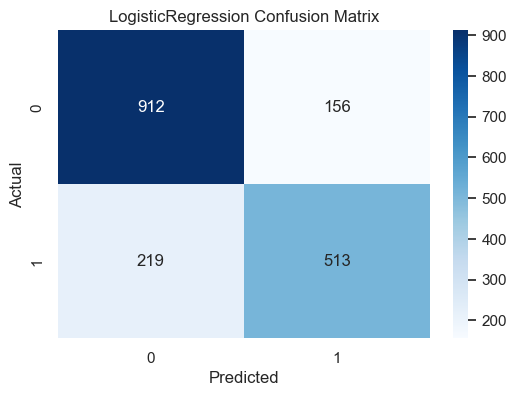

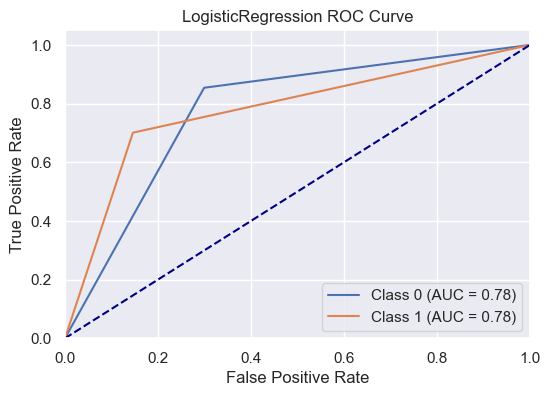


<<<<------------------------------------------------------------->>>>

Model name: DecisionTree
Train Accuracy: 1.0
Test Accuracy: 0.9166666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1068
           1       0.90      0.89      0.90       732

    accuracy                           0.92      1800
   macro avg       0.91      0.91      0.91      1800
weighted avg       0.92      0.92      0.92      1800

Precision: 0.9165277777777778, Recall: 0.9166666666666666, F1 Score: 0.9165550887237022


Confusion Matrix:


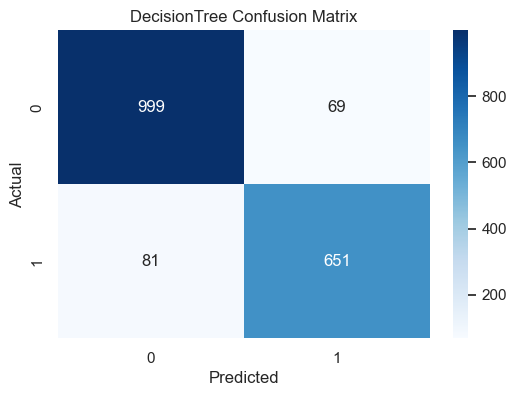

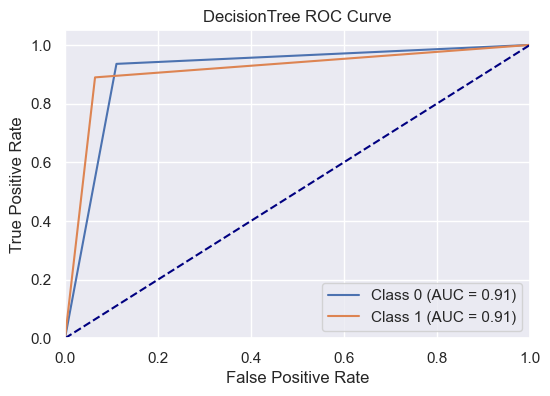


<<<<------------------------------------------------------------->>>>

Model name: GradiantBoost
Train Accuracy: 0.96375
Test Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1068
           1       0.95      0.92      0.94       732

    accuracy                           0.95      1800
   macro avg       0.95      0.95      0.95      1800
weighted avg       0.95      0.95      0.95      1800

Precision: 0.9500426411681094, Recall: 0.95, F1 Score: 0.9498734509145084


Confusion Matrix:


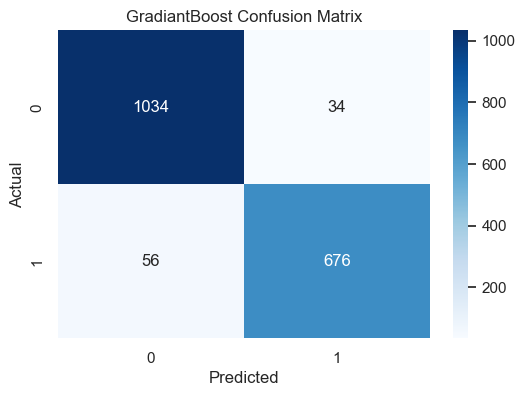

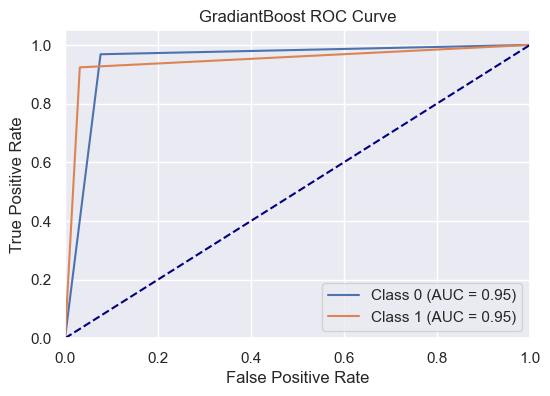


<<<<------------------------------------------------------------->>>>

Model name: RandomForest
Train Accuracy: 1.0
Test Accuracy: 0.9561111111111111

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1068
           1       0.97      0.92      0.94       732

    accuracy                           0.96      1800
   macro avg       0.96      0.95      0.95      1800
weighted avg       0.96      0.96      0.96      1800

Precision: 0.9565022049772521, Recall: 0.9561111111111111, F1 Score: 0.9559274130857628


Confusion Matrix:


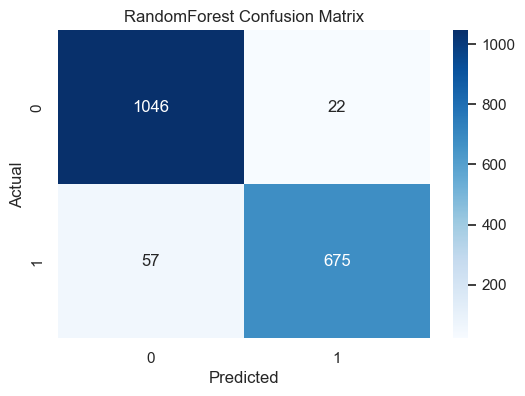

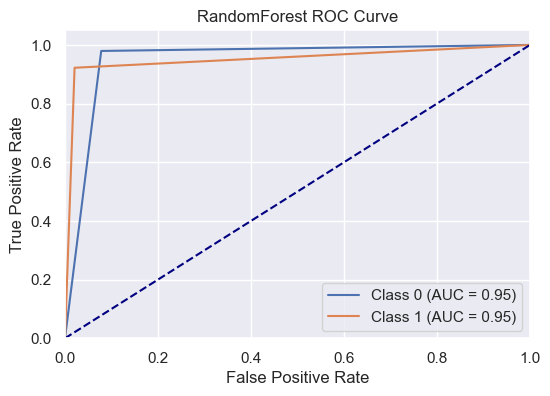


<<<<------------------------------------------------------------->>>>

Model name: KNeighborsClassifier
Train Accuracy: 0.9130555555555555
Test Accuracy: 0.8416666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1068
           1       0.81      0.80      0.80       732

    accuracy                           0.84      1800
   macro avg       0.84      0.84      0.84      1800
weighted avg       0.84      0.84      0.84      1800

Precision: 0.8415683969060875, Recall: 0.8416666666666667, F1 Score: 0.8416151399692615


Confusion Matrix:


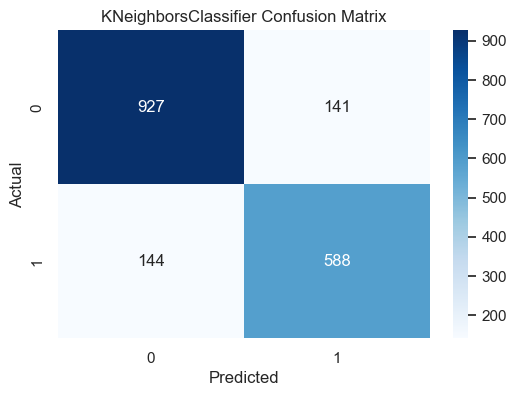

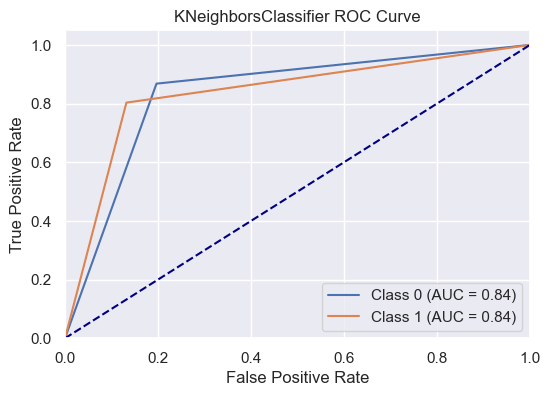


<<<<------------------------------------------------------------->>>>



In [28]:
scores = models_score(models, x_train, x_test, y_train, y_test)

In [29]:
scores

Test Accuracy  Train Accuracy  Precision    Recall  \
LogisticRegression         0.791667        0.801389   0.790282  0.791667   
DecisionTree               0.916667        1.000000   0.916528  0.916667   
GradiantBoost              0.950000        0.963750   0.950043  0.950000   
RandomForest               0.956111        1.000000   0.956502  0.956111   
KNeighborsClassifier       0.841667        0.913056   0.841568  0.841667   

                      F1 Score  
LogisticRegression    0.789967  
DecisionTree          0.916555  
GradiantBoost         0.949873  
RandomForest          0.955927  
KNeighborsClassifier  0.841615

# Comparing model results

In [30]:
fig_r2 = px.bar(data_frame=scores,
                x=scores.index,
                y="Train Accuracy",
                color=scores.index,
                text="Train Accuracy",  # Add this line to display the values
                title="<b>Models Train Accuracy</b>", 
                template='plotly_dark')

# Update the layout
fig_r2.update_layout(bargap=0.2)
fig_r2.update_traces(texttemplate='%{text:.4f}', textposition='outside')  # Customize the text format

# Show the figure
fig_r2.show()

In [31]:
# Visualize the Test Accuracy with labels on each bar
fig_r2 = px.bar(data_frame=scores,
                x=scores.index,
                y="Test Accuracy",
                color=scores.index,
                text="Test Accuracy",  # Add this line to display the values
                title="<b>Models Test Accuracy</b>", 
                template='plotly_dark')

# Update the layout
fig_r2.update_layout(bargap=0.2)
fig_r2.update_traces(texttemplate='%{text:.4f}', textposition='outside')  # Customize the text format

# Show the figure
fig_r2.show()

In [32]:
fig_r2 = px.bar(data_frame=scores,
                x=scores.index,
                y="Precision",
                color=scores.index,
                text="Precision",  # Add this line to display the values
                title="<b>Models Precision</b>", 
                template='plotly_dark')

# Update the layout
fig_r2.update_layout(bargap=0.2)
fig_r2.update_traces(texttemplate='%{text:.4f}', textposition='outside')  # Customize the text format

# Show the figure
fig_r2.show()

In [33]:
fig_r2 = px.bar(data_frame=scores,
                x=scores.index,
                y="Recall",
                color=scores.index,
                text="Recall",  # Add this line to display the values
                title="<b>Models Recall</b>", 
                template='plotly_dark')

# Update the layout
fig_r2.update_layout(bargap=0.2)
fig_r2.update_traces(texttemplate='%{text:.4f}', textposition='outside')  # Customize the text format

# Show the figure
fig_r2.show()

In [34]:
# Visualize the F1 Score with labels on each bar
fig_r2 = px.bar(data_frame=scores,
                x=scores.index,
                y="F1 Score",
                color=scores.index,
                text="F1 Score",  # Add this line to display the values
                title="<b>Models F1 Score</b>", 
                template='plotly_dark')

# Update the layout
fig_r2.update_layout(bargap=0.2)
fig_r2.update_traces(texttemplate='%{text:.4f}', textposition='outside')  # Customize the text format

# Show the figure
fig_r2.show()


In [35]:
value = scores['Test Accuracy']

fig = go.Figure(data=[go.Pie(labels = scores.index, values = value, rotation = 90,title="<b>Models Test Score</b>")])

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.2)))

fig.update_layout(title_x=0.5,
                  title_font=dict(size=20),
                  uniformtext_minsize=15)

fig.show()

# Conclusion

### Random forest slightly performed well compared to Gradient Boost and Decision Tree. While others also performed quite well in this dataset.